In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
projects = pd.read_csv('data/projects.tsv', sep='\t')
projects.head()

,project_creation_timestamp,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,...,project_has_suggest_input,project_has_textarea_input,project_has_video,project_id,project_instruction_FK,project_instruction_language,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length
0,1428398401,0,1,0,0,0,0,0,0,0,...,0,0,0,1,20.068254,ru,3208.0,319.0,1,1196
1,1436341103,0,0,0,0,0,0,0,0,0,...,0,0,0,2,31.446345,ru,3289.0,312.0,1,1663
2,1437037937,0,0,0,0,0,0,0,0,0,...,0,0,0,3,-43.736713,ru,6288.0,637.0,1,2483
3,1439365405,0,0,0,0,0,0,0,0,0,...,0,0,0,4,16.488188,ru,4369.0,460.0,1,635
4,1439968554,0,1,0,0,0,0,0,0,0,...,0,0,0,5,17.768214,ru,38650.0,3565.0,1,9527


In [3]:
# заменим NaN-значения на 0
projects = projects.fillna(0)

In [4]:
assignments = pd.read_csv('data/assignments.tsv', sep='\t')
assignments.head()

,assignment_gs_correct_count,assignment_gs_count,assignment_id,assignment_price,assignment_project_id,assignment_start_time,assignment_status,assignment_submit_time,assignment_type,device_category,microtasks_count,os_family,user_id
0,13,15,fe52c68a-48ec-4837-a24c-4c2bd191431f,0.0,14,1538145644,APPROVED,1538145992,train,PERSONAL_COMPUTER,15,WINDOWS,285e5c5ae20b40309aaea1057a40c6e1
1,13,15,d19953f6-1f53-4b54-8fa4-d7374ca0607b,0.0,14,1538150924,APPROVED,1538151375,train,SMARTPHONE,15,ANDROID,83ce7022b6504a979e4ad376162b3652
2,9,15,3aea0026-faae-4845-8708-9bf323ff8a77,0.0,14,1538148115,APPROVED,1538148369,train,PERSONAL_COMPUTER,15,WINDOWS,49c203950e65419eb472ef7b527db377
3,9,15,74144001-ee63-46ac-90a3-0ff697bd67b8,0.0,14,1538152210,APPROVED,1538152579,train,PERSONAL_COMPUTER,15,WINDOWS,e4106d0f26df48238b1fa7adfb14e61d
4,14,15,786b6812-d50b-43f1-a48e-5ba0c98e5a72,0.0,14,1538144628,APPROVED,1538144869,train,PERSONAL_COMPUTER,15,WINDOWS,d1b97ba55c3f477ebae683faa956de14


In [5]:
len(assignments['user_id']), len(assignments['user_id'].unique()) # общее число записей, число уникальных пользователей

(18517325, 161377)

In [6]:
unique_user_id = assignments['user_id'].unique() # список ID уникальных пользователей

In [45]:
def preferences(userID, projects=projects): # функиця, выводящая таблицу 5 самых любимых проектов выбранного пользователя
    tasksOfUser = assignments[assignments['user_id'] == userID] # все задания, которые прощел данный пользователь
    projectListOfUser = tasksOfUser['assignment_project_id'] # из всей таблицы выбирается только столбец с ID проектов
    topProjectForUser = pd.DataFrame(tasksOfUser['assignment_project_id'].value_counts().head()) # создается новая таблица с подсчетом количества одинаковых типов заданий, выбираются 5 самых популярных
    indexList = list(topProjectForUser.index) # список индексов самых популярных проектов
    res = projects[projects['project_id'].isin(indexList)] # 5 самых популярных типов проектов
    
    return res    

In [46]:
preferences(unique_user_id[2])

,project_creation_timestamp,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,...,project_has_suggest_input,project_has_textarea_input,project_has_video,project_id,project_instruction_FK,project_instruction_language,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length
11,1450949616,0,0,0,0,0,0,0,0,0,...,0,0,0,12,-21.506304,ru,700.0,77.0,1,559
40,1479213741,0,2,0,0,0,0,0,0,0,...,0,0,0,41,16.917249,ru,2583.0,282.0,1,630
59,1483031157,0,0,0,0,0,0,0,0,0,...,0,0,0,60,34.007831,ru,2327.0,249.0,1,839
92,1492144969,0,0,0,0,0,0,0,0,0,...,0,0,0,93,-131.899146,ru,1039.0,96.0,1,284
143,1503052490,0,0,0,0,0,0,0,0,0,...,0,0,0,144,-5.003519,ru,3839.0,341.0,1,708


In [9]:
preferences(unique_user_id[2]).iloc[:,1:21]

,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,project_has_image,project_has_imageAnnotation_input,project_has_radio_input,project_has_sbs,project_has_select_input,project_has_sourcesRecorder_input,project_has_string_input,project_has_suggest_input,project_has_textarea_input,project_has_video
11,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
40,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,0


## Преобразование таблицы projects в 2: банирная и интервальная таблицы

### Бинарная таблица

In [10]:
projects_bin = projects.copy() # просто копируем таблицу
id_of_project = projects_bin['project_id'] # запоминаем значения данного столбца, чтобы потом поставить его в конец (для удобства)
projects_bin.drop(['project_creation_timestamp', 'project_id'], axis=1, inplace=True) # удаляем столбцы
projects_bin['project_id'] = id_of_project # ставим столбец с id проектов в конец
projects_bin.head()

,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,...,project_has_suggest_input,project_has_textarea_input,project_has_video,project_instruction_FK,project_instruction_language,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length,project_id
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,20.068254,ru,3208.0,319.0,1,1196,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,31.446345,ru,3289.0,312.0,1,1663,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-43.736713,ru,6288.0,637.0,1,2483,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,16.488188,ru,4369.0,460.0,1,635,4
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,17.768214,ru,38650.0,3565.0,1,9527,5


In [11]:
# преобразуем все признаки в бинарный вид
for i in projects_bin.iloc[:,:20].columns:
    projects_bin.loc[(projects_bin[i] > 0), i] = 1
projects_bin.head()

,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,...,project_has_suggest_input,project_has_textarea_input,project_has_video,project_instruction_FK,project_instruction_language,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length,project_id
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,20.068254,ru,3208.0,319.0,1,1196,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,31.446345,ru,3289.0,312.0,1,1663,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-43.736713,ru,6288.0,637.0,1,2483,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,16.488188,ru,4369.0,460.0,1,635,4
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,17.768214,ru,38650.0,3565.0,1,9527,5


In [12]:
projects_bin['project_instruction_language'].value_counts()

ru    734
0      18
en      5
tr      4
vi      2
uk      2
id      1
bg      1
Name: project_instruction_language, dtype: int64

In [13]:
# работа со столбцом "языки"
projects_bin['project_language_ru'] = projects_bin['project_instruction_language'].replace({'ru' : 1, 'en' : 0, 'tr' : 0, 'uk' : 0, 'vi' : 0, 'id' : 0, 'bg' : 0})
projects_bin['project_language_en'] = projects_bin['project_instruction_language'].replace({'ru' : 0, 'en' : 1, 'tr' : 0, 'uk' : 0, 'vi' : 0, 'id' : 0, 'bg' : 0})
projects_bin['project_language_tr'] = projects_bin['project_instruction_language'].replace({'ru' : 0, 'en' : 0, 'tr' : 1, 'uk' : 0, 'vi' : 0, 'id' : 0, 'bg' : 0})
projects_bin['project_language_other'] = projects_bin['project_instruction_language'].replace({'ru' : 0, 'en' : 0, 'tr' : 0, 'uk' : 1, 'vi' : 1, 'id' : 1, 'bg' : 1})
projects_bin.drop('project_instruction_language', axis=1, inplace=True)
projects_bin.head()

,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,...,project_instruction_FK,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length,project_id,project_language_ru,project_language_en,project_language_tr,project_language_other
0,0,1,0,0,0,0,0,0,0,0,...,20.068254,3208.0,319.0,1,1196,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,31.446345,3289.0,312.0,1,1663,2,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,-43.736713,6288.0,637.0,1,2483,3,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,16.488188,4369.0,460.0,1,635,4,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,17.768214,38650.0,3565.0,1,9527,5,1,0,0,0


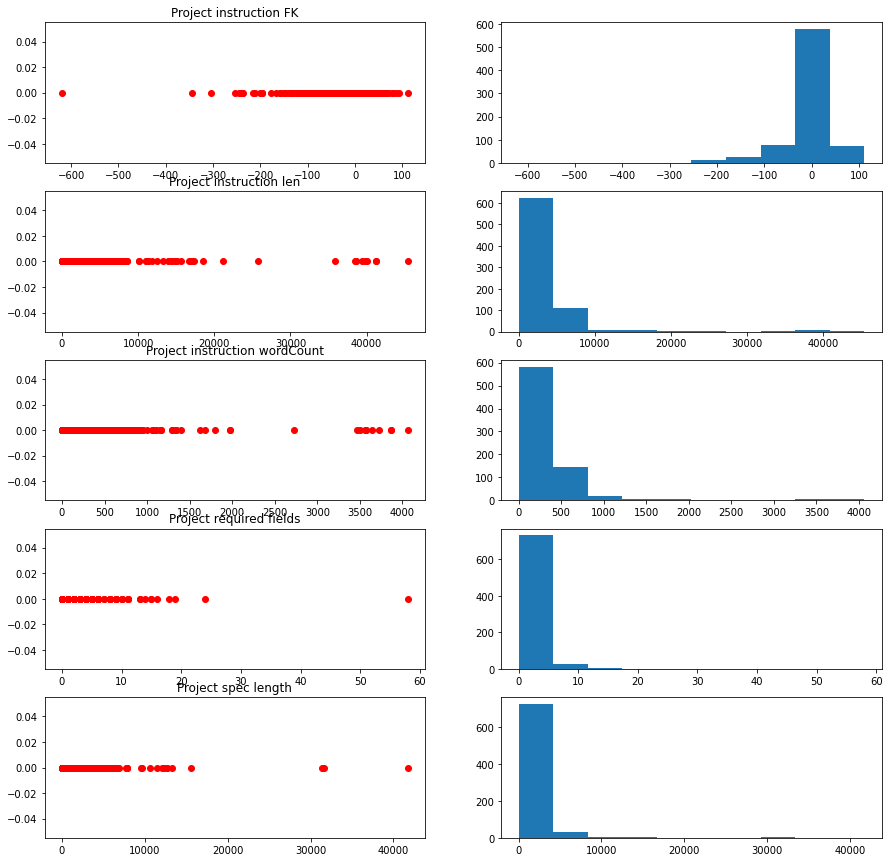

In [14]:
fig, axs = plt.subplots(5, 2, figsize=(15,15))

axs[0][0].plot(list(projects_bin['project_instruction_FK']), [0]*len(projects_bin['project_instruction_FK']), 'ro')
axs[0][0].set_title('Project instruction FK')
axs[0][1].hist(projects_bin['project_instruction_FK'])

axs[1][0].plot(list(projects_bin['project_instruction_len']), [0]*len(projects_bin['project_instruction_len']), 'ro')
axs[1][0].set_title('Project instruction len')
axs[1][1].hist(projects_bin['project_instruction_len'])

axs[2][0].plot(list(projects_bin['project_instruction_wordCount']), [0]*len(projects_bin['project_instruction_wordCount']), 'ro')
axs[2][0].set_title('Project instruction wordCount')
axs[2][1].hist(projects_bin['project_instruction_wordCount'])

axs[3][0].plot(list(projects_bin['project_required_fields']), [0]*len(projects_bin['project_required_fields']), 'ro')
axs[3][0].set_title('Project required fields')
axs[3][1].hist(projects_bin['project_required_fields'])

axs[4][0].plot(list(projects_bin['project_spec_length']), [0]*len(projects_bin['project_spec_length']), 'ro')
axs[4][0].set_title('Project spec length')
axs[4][1].hist(projects_bin['project_spec_length'])

plt.show()

Благодаря данным графикам можно определить на какие интервалы делить каждую величину

In [15]:
# разделим на 3 интервала и бинарно закодируем принадлежность каждому интервалу
for i in projects_bin.iloc[:,20:25].columns:
    range_column = projects_bin[i].sort_values().to_numpy() # отсортируем данные по возрастанию
    length = len(range_column) # количество записей в таблице
    
    part1 = range_column[:round(length*0.33)][-1] # граница первого промежутка
    part2 = range_column[:round(length*0.66)][-1] # граница второго промежутка
    
    for j in range(length):
        num = projects_bin[i].iloc[j]
        if num <= part1:
            projects_bin[i].iloc[j] = '1'
        elif num >= part2:
            projects_bin[i].iloc[j] = '3'
        else:
            projects_bin[i].iloc[j] = '2'
projects_bin.head()

c:\program files\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,...,project_instruction_FK,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length,project_id,project_language_ru,project_language_en,project_language_tr,project_language_other
0,0,1,0,0,0,0,0,0,0,0,...,3,3,3,1,3,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,3,3,3,1,3,2,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,3,3,1,3,3,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,3,3,1,2,4,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,3,3,3,1,3,5,1,0,0,0


In [16]:
bin_col = pd.get_dummies(projects_bin.iloc[:,20:25], drop_first=True) # теперь столбцы с 1, 2 и 3 преобразуем в бинарные
projects_bin.drop(list(projects_bin.iloc[:,20:25].columns), axis=1, inplace=True) # удаляем предыдущее преобразование по интервалам
projects_bin = pd.concat([projects_bin, bin_col], axis=1)# объединяем начальный df и новый с бинарной кодировкой
projects_bin.head()

,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,...,project_language_other,project_instruction_FK_2,project_instruction_FK_3,project_instruction_len_2,project_instruction_len_3,project_instruction_wordCount_2,project_instruction_wordCount_3,project_required_fields_3,project_spec_length_2,project_spec_length_3
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1


In [17]:
# преобразуем все столбцы в тип int
for i in projects_bin.columns:
    projects_bin = projects_bin.astype({i: np.int64})

In [18]:
# проверка
sum(projects_bin['project_has_audio'])

33

### Интервальная таблица

для начала проведем аналогичные преобразование с 5 последними столбцами

In [19]:
projects_interval = projects.copy()
projects_interval.drop('project_creation_timestamp', axis=1, inplace=True) # удаляем столбцы
projects_interval.head()

,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,...,project_has_suggest_input,project_has_textarea_input,project_has_video,project_id,project_instruction_FK,project_instruction_language,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,20.068254,ru,3208.0,319.0,1,1196
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,31.446345,ru,3289.0,312.0,1,1663
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,-43.736713,ru,6288.0,637.0,1,2483
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,16.488188,ru,4369.0,460.0,1,635
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,5,17.768214,ru,38650.0,3565.0,1,9527


In [20]:
# будем каждый столбец делить также на интервалы значений и кодировать с помощью номера интервала
for i in projects_interval.iloc[:,:20].columns:
    range_column = list(((projects_interval[i].value_counts().sort_index())[1:]).index) # отсортируем данные по возрастанию
    length = len(projects_interval) # количество записей в таблице
    
    if len(range_column) >= 3:
        part1 = range_column[:round(len(range_column)*0.33)][-1] # граница первого промежутка
        part2 = range_column[:round(len(range_column)*0.66)][-1] # граница второго промежутка

        for j in range(length):
            num = projects_interval[i].iloc[j]
            if num == 0:
                projects_interval[i].iloc[j] = '0'
            elif num <= part1:
                projects_interval[i].iloc[j] = '1'
            elif num >= part2:
                projects_interval[i].iloc[j] = '3'
            else:
                projects_interval[i].iloc[j] = '2'
    
    else:
        for j in range(length):
            num = projects_interval[i].iloc[j]
            if num == 0:
                projects_interval[i].iloc[j] = '0'
            else:
                projects_interval[i].iloc[j] = '1'
projects_interval.head()

c:\program files\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,...,project_has_suggest_input,project_has_textarea_input,project_has_video,project_id,project_instruction_FK,project_instruction_language,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,20.068254,ru,3208.0,319.0,1,1196
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,31.446345,ru,3289.0,312.0,1,1663
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,-43.736713,ru,6288.0,637.0,1,2483
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,16.488188,ru,4369.0,460.0,1,635
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,5,17.768214,ru,38650.0,3565.0,1,9527


In [21]:
projects_interval['project_has_audio'].value_counts()

0    734
1     21
2      9
3      3
Name: project_has_audio, dtype: int64

по аналогии с рпедыдущей таблицей рассмотрим последние признаки

In [22]:
# работа со столбцом "языки"
projects_interval['project_language_ru'] = projects_interval['project_instruction_language'].replace({'ru' : 1, 'en' : 0, 'tr' : 0, 'uk' : 0, 'vi' : 0, 'id' : 0, 'bg' : 0})
projects_interval['project_language_en'] = projects_interval['project_instruction_language'].replace({'ru' : 0, 'en' : 1, 'tr' : 0, 'uk' : 0, 'vi' : 0, 'id' : 0, 'bg' : 0})
projects_interval['project_language_tr'] = projects_interval['project_instruction_language'].replace({'ru' : 0, 'en' : 0, 'tr' : 1, 'uk' : 0, 'vi' : 0, 'id' : 0, 'bg' : 0})
projects_interval['project_language_other'] = projects_interval['project_instruction_language'].replace({'ru' : 0, 'en' : 0, 'tr' : 0, 'uk' : 1, 'vi' : 1, 'id' : 1, 'bg' : 1})
projects_interval.drop('project_instruction_language', axis=1, inplace=True)
projects_interval.head()

,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,...,project_id,project_instruction_FK,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length,project_language_ru,project_language_en,project_language_tr,project_language_other
0,0,1,0,0,0,0,0,0,0,0,...,1,20.068254,3208.0,319.0,1,1196,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,31.446345,3289.0,312.0,1,1663,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,3,-43.736713,6288.0,637.0,1,2483,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,4,16.488188,4369.0,460.0,1,635,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,5,17.768214,38650.0,3565.0,1,9527,1,0,0,0


In [23]:
# разделим последние столбцы на 3 интервала и бинарно закодируем принадлежность каждому интервалу
for i in projects_interval.iloc[:,21:26].columns:
    range_column = projects_interval[i].sort_values().to_numpy() # отсортируем данные по возрастанию
    length = len(range_column) # количество записей в таблице
    
    part1 = range_column[:round(length*0.33)][-1] # граница первого промежутка
    part2 = range_column[:round(length*0.66)][-1] # граница второго промежутка
    
    for j in range(length):
        num = projects_interval[i].iloc[j]
        if num <= part1:
            projects_interval[i].iloc[j] = '1'
        elif num >= part2:
            projects_interval[i].iloc[j] = '3'
        else:
            projects_interval[i].iloc[j] = '2'
projects_interval.head()

c:\program files\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,...,project_id,project_instruction_FK,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length,project_language_ru,project_language_en,project_language_tr,project_language_other
0,0,1,0,0,0,0,0,0,0,0,...,1,3,3,3,1,3,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,1,3,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,3,1,3,3,1,3,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,4,2,3,3,1,2,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,5,3,3,3,1,3,1,0,0,0


In [24]:
projects_interval = pd.get_dummies(projects_interval, drop_first=True) # теперь столбцы с 1, 2 и 3 преобразуем в бинарные
projects_interval.head()

,project_id,project_language_ru,project_language_en,project_language_tr,project_language_other,project_has_audio_1,project_has_audio_2,project_has_audio_3,project_has_button_1,project_has_button_2,...,project_has_video_1,project_instruction_FK_2,project_instruction_FK_3,project_instruction_len_2,project_instruction_len_3,project_instruction_wordCount_2,project_instruction_wordCount_3,project_required_fields_3,project_spec_length_2,project_spec_length_3
0,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
1,2,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,4,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,5,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1


In [25]:
# преобразуем все столбцы в тип int
for i in projects_interval.columns:
    projects_interval = projects_interval.astype({i: "int64"})

In [26]:
# проверка
sum(projects_bin['project_spec_length_2'])

252

## Рассчет евклидовых расстояний разных типов проектов и вывод 5 ближайших как рекомендации

In [27]:
from sklearn.neighbors import NearestNeighbors

In [28]:
prefer = preferences(unique_user_id[2])

In [29]:
prefer

,project_creation_timestamp,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,...,project_has_suggest_input,project_has_textarea_input,project_has_video,project_id,project_instruction_FK,project_instruction_language,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length
11,1450949616,0,0,0,0,0,0,0,0,0,...,0,0,0,12,-21.506304,ru,700.0,77.0,1,559
40,1479213741,0,2,0,0,0,0,0,0,0,...,0,0,0,41,16.917249,ru,2583.0,282.0,1,630
59,1483031157,0,0,0,0,0,0,0,0,0,...,0,0,0,60,34.007831,ru,2327.0,249.0,1,839
92,1492144969,0,0,0,0,0,0,0,0,0,...,0,0,0,93,-131.899146,ru,1039.0,96.0,1,284
143,1503052490,0,0,0,0,0,0,0,0,0,...,0,0,0,144,-5.003519,ru,3839.0,341.0,1,708


In [30]:
def recommendations(prefer, projects, user_id, recomend_count=5):
    indexes = prefer.index # индексы предпочтений
    allTypeOfProjects = projects.drop('project_id', axis=1).values # все колонки, отвечающие за тип проекта
    
    allSelection = [] # это будет список со всеми рекомендациями
    allIndex = [] # индексы всех рекомендаций
    
    for i in range(len(prefer)):
        neighbors = NearestNeighbors(n_neighbors=5) # выбираем 5 наиболее похожих проекта 
        neighbors.fit(allTypeOfProjects) # обучаем на всех данных, связанных с типом проекта
        preference = prefer.drop('project_id', axis=1).values[i] # поочередно берем каждый из предпочтенных вариантов
        recommends = neighbors.kneighbors([preference]) # 5 наиболее близких к данному предпочтению рекомендаций
        
        allSelection.append(recommends[0])
        allIndex.append(recommends[1])
        
    # теперь из полученных рекоменаций выберем 5 самых ближних
    df = pd.DataFrame({'distance':list(np.array(allSelection).flatten()), 
                       'index':list(np.array(allIndex).flatten())}) # создаем таблицу из всех рекомендаций
    df.sort_values('distance', inplace=True) # сортируем по столбцу расстояний, чтобы сначала были самые близкие, а потом уже те, которые дальше по расстоянию
    resIndex = (df.head(recomend_count))['index'] # выбираем индексы ближайшие проекты
    return resIndex

In [31]:
projects_bin.iloc[list(prefer.index)] # предпочтения по бинарной таблице

,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,...,project_language_other,project_instruction_FK_2,project_instruction_FK_3,project_instruction_len_2,project_instruction_len_3,project_instruction_wordCount_2,project_instruction_wordCount_3,project_required_fields_3,project_spec_length_2,project_spec_length_3
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
59,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [32]:
# получаем список рекомендаций
recommendations(projects_bin.iloc[list(prefer.index)], projects_bin, unique_user_id[2], 8)

0     164
22    682
21    142
20    143
19    234
18    434
17     68
16    396
Name: index, dtype: int64

таким образом можно увидеть индексы рекомендаций: 164, 682, 142, 143, 234

теперь отсортируем их так, чтобы можно было увидеть влияние количества различных элементов в проекте

In [33]:
bin_recomends = recommendations(projects_bin.iloc[list(prefer.index)], projects_bin, unique_user_id[2], 8) # получаем список рекомендаци
interval_recomends = projects_interval.iloc[list(bin_recomends.values)] # из интервальной таблице выделим наши рекомендации
interval_recomends

,project_id,project_language_ru,project_language_en,project_language_tr,project_language_other,project_has_audio_1,project_has_audio_2,project_has_audio_3,project_has_button_1,project_has_button_2,...,project_has_video_1,project_instruction_FK_2,project_instruction_FK_3,project_instruction_len_2,project_instruction_len_3,project_instruction_wordCount_2,project_instruction_wordCount_3,project_required_fields_3,project_spec_length_2,project_spec_length_3
164,165,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
682,683,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
142,143,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
143,144,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
234,235,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
434,435,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,69,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,397,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# запустим предыдущую функцию от таблицы interval_recomends, чтобы упорядочить значения
interval_recomends_index = recommendations(projects_interval.iloc[list(prefer.index)], interval_recomends, unique_user_id[2], 8)
interval_recomends_index

0     0
22    2
21    3
20    1
18    5
17    6
16    7
15    4
Name: index, dtype: int64

In [35]:
# и теперь отсортируем предыдущий результат в соответствии с полученными данными
sorted_index = []
index_list = list(interval_recomends.index) # список индексов рекомендаций из бинарной таблицы
for i in list(interval_recomends_index.values):
    sorted_index.append(index_list[i])
sorted_index

[164, 142, 143, 682, 434, 68, 396, 234]

In [36]:
# итог
itog_recomends = projects.iloc[sorted_index]
itog_recomends

,project_creation_timestamp,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,...,project_has_suggest_input,project_has_textarea_input,project_has_video,project_id,project_instruction_FK,project_instruction_language,project_instruction_len,project_instruction_wordCount,project_required_fields,project_spec_length
164,1507870329,0,0,0,0,0,0,0,0,0,...,0,0,0,165,-28.999158,ru,802.0,84.0,1,653
142,1503052488,0,0,0,0,0,0,0,0,0,...,0,0,0,143,-5.003519,ru,3839.0,341.0,1,673
143,1503052490,0,0,0,0,0,0,0,0,0,...,0,0,0,144,-5.003519,ru,3839.0,341.0,1,708
682,1541743321,0,0,0,0,0,0,0,0,0,...,0,0,0,683,-7.483832,ru,3065.0,330.0,1,921
434,1534837029,0,0,0,0,0,0,0,0,0,...,0,0,0,435,-42.410652,ru,376.0,37.0,1,237
68,1485929413,0,0,0,0,0,0,0,0,0,...,0,0,0,69,-74.984101,ru,673.0,75.0,1,299
396,1531386324,0,0,0,0,0,0,0,0,0,...,0,0,0,397,-68.613696,ru,730.0,80.0,1,313
234,1516914793,0,0,0,0,0,0,0,0,0,...,0,0,0,235,-101.351275,ru,848.0,86.0,1,345


In [37]:
itog_recomends.iloc[:,1:21]

,project_has_audio,project_has_button,project_has_buttonClicked_input,project_has_checkbox_input,project_has_externalHtml,project_has_fileAudio_input,project_has_fileImg_input,project_has_fileVideo_input,project_has_file_input,project_has_iframe,project_has_image,project_has_imageAnnotation_input,project_has_radio_input,project_has_sbs,project_has_select_input,project_has_sourcesRecorder_input,project_has_string_input,project_has_suggest_input,project_has_textarea_input,project_has_video
164,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
142,0,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,0
682,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0
434,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
234,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0


## Проверка качества

проверим качество работы алгоритма. для этого выберем 10 самых активных пользователей

In [38]:
the_most_active = (assignments['user_id'].value_counts()).head(10) # 10 самых активных пользователя и их id
the_most_active

fb70f003440244f2b565b2735d20e704    74393
07a5649d033243ceb5d28be47818b42b    49302
4e00d78d066c419eaab390041f8e459d    34339
2bc20927957642958daf7307454b5d3d    32319
9b3881d5a26945fa98daeca057a9a1e7    27025
c64614647a3f4732b4337773d9956e3a    26741
a6ac24250f7a48f58a067c5f641a6602    26121
35dc1be1896049d580b60d66281ef60a    21624
b274c26d76bb4c2ebd8f29c1c4966c0c    20163
ae640e04d3a74eeb9695429fd74c1ecd    18254
Name: user_id, dtype: int64

In [39]:
the_most_active_df = pd.DataFrame({'user_id' : the_most_active.index}) # оборачиваем данный список в DataFrame
the_most_active_df

,user_id
0,fb70f003440244f2b565b2735d20e704
1,07a5649d033243ceb5d28be47818b42b
2,4e00d78d066c419eaab390041f8e459d
3,2bc20927957642958daf7307454b5d3d
4,9b3881d5a26945fa98daeca057a9a1e7
5,c64614647a3f4732b4337773d9956e3a
6,a6ac24250f7a48f58a067c5f641a6602
7,35dc1be1896049d580b60d66281ef60a
8,b274c26d76bb4c2ebd8f29c1c4966c0c
9,ae640e04d3a74eeb9695429fd74c1ecd


In [40]:
only_activ_assignments = assignments.merge(the_most_active_df, on='user_id') # выбор из всего df тех записей, где участвуют данные пользователи
only_activ_assignments.head()

,assignment_gs_correct_count,assignment_gs_count,assignment_id,assignment_price,assignment_project_id,assignment_start_time,assignment_status,assignment_submit_time,assignment_type,device_category,microtasks_count,os_family,user_id
0,9,14,ebfdc508-23e9-4071-9a80-8282b7f873f0,0.0,32,1539977680,APPROVED,1539977758,train,PERSONAL_COMPUTER,14,OS_X,fb70f003440244f2b565b2735d20e704
1,12,24,8c35e587-568e-4589-a0db-78dd716c813f,0.0,46,1539977977,APPROVED,1539978087,train,PERSONAL_COMPUTER,24,OS_X,fb70f003440244f2b565b2735d20e704
2,4,4,f65a3540-df92-4acb-ba9a-8109d5985038,0.0,4,1540563906,APPROVED,1540563951,train,PERSONAL_COMPUTER,4,OS_X,fb70f003440244f2b565b2735d20e704
3,4,4,6d366890-facf-4bdd-8314-9bab2f05e59d,0.0,4,1540564037,APPROVED,1540564086,train,PERSONAL_COMPUTER,4,OS_X,fb70f003440244f2b565b2735d20e704
4,10,10,d9c49faf-61fa-438f-84d3-d7040201287f,0.0,100,1539783178,APPROVED,1539783207,train,PERSONAL_COMPUTER,10,OS_X,fb70f003440244f2b565b2735d20e704


In [41]:
only_activ_assignments['user_id'].value_counts() == the_most_active # проверка

fb70f003440244f2b565b2735d20e704    True
07a5649d033243ceb5d28be47818b42b    True
4e00d78d066c419eaab390041f8e459d    True
2bc20927957642958daf7307454b5d3d    True
9b3881d5a26945fa98daeca057a9a1e7    True
c64614647a3f4732b4337773d9956e3a    True
a6ac24250f7a48f58a067c5f641a6602    True
35dc1be1896049d580b60d66281ef60a    True
b274c26d76bb4c2ebd8f29c1c4966c0c    True
ae640e04d3a74eeb9695429fd74c1ecd    True
Name: user_id, dtype: bool

In [220]:
def quality_control(only_activ_assignments=only_activ_assignments, count_of_recomends=5):
    res_list = []
    for i in (the_most_active.index):
        one_user = only_activ_assignments[only_activ_assignments['user_id'] == i] # берем все записи, соответствующие i-ому пользователю из бинарной таблицы
        one_user = one_user.sort_values('assignment_start_time') # сортируем в хронологическом порядке
        one_user_projects_id = pd.DataFrame(one_user['assignment_project_id'].unique(), columns=['project_id']) # все id проектов пользователя
        one_user_in_train = (one_user_projects_id.head(int(len(projects)*0.7))).merge(projects, on='project_id')
        one_user_prefer = preferences(i, one_user_in_train) # предпочтения отдельного пользователя

        one_user_in_test = ((one_user_projects_id.tail(int(len(projects)*0.3))).merge(projects, on='project_id'))['project_id'] # смотрим какие проекты в тестовой выборке решал i-ый пользователь
        assignments_sort = ((assignments.sort_values('assignment_start_time')).tail(int(len(assignments)*0.3)))['assignment_project_id'] # сортируем все записи по времени и выбираем последние 30% записей
        prodj_test = pd.DataFrame(assignments_sort.append(one_user_in_test), columns=['project_id']) # соединяю предыдущие 2 списка и формирую df
        prodj_test_index = list(((prodj_test['project_id'].unique()) - 1)) # так как id проекта - это индекс проекта + 1, то можно получить список индексов

        one_user_recomends = recommendations(projects_bin.iloc[list(one_user_prefer.index)], projects_bin.iloc[prodj_test_index], i, count_of_recomends) # рекомендации пользователю
        one_user_recomends_df = projects.iloc[one_user_recomends.values] # отбираем из общей таблицы проектов те, которые были отрекомендованы

        count = 0 # считаем количество тех рекомендаций, которые были выполнены
        for j in one_user_recomends_df['project_id'].values:
            if j in list(one_user_in_test):
                count += 1
                
        res_list.append(count)
    return res_list
  
#         res = count / len(one_user_recomends) 
#         res_list.append(res)

#     return res_list


In [207]:
res5 = quality_control()

In [211]:
res5, np.mean(res5)

([0.2, 0.0, 0.0, 0.2, 0.0, 0.6, 0.0, 0.4, 0.4, 0.0], 0.18)

Рассмотрим 100 самых активных пользователей

In [215]:
the_most_active_100 = (assignments['user_id'].value_counts()).head(100) # 100 самых активных пользователя и их id
the_most_active_100_df = pd.DataFrame({'user_id' : the_most_active_100.index}) # оборачиваем данный список в DataFrame
only_activ_assignments_100 = assignments.merge(the_most_active_100_df, on='user_id') # выбор из всего df тех записей, где участвуют данные пользователи

In [221]:
res100 = quality_control(only_activ_assignments=only_activ_assignments_100)

In [226]:
pd.Series(res100).value_counts()

0    47
1    32
2    13
3     6
4     2
dtype: int64